In [83]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm
import numpy as np

from scipy.ndimage import median_filter
def auto_mask(image, size=2, thershold=5):

    blur_image = median_filter(image, size)
    diff_image = image - blur_image
    thershold_value = thershold*np.std(diff_image)
    
    print thershold_value

    hot_pixels = np.nonzero(np.abs(image) > thershold_value)
    hot_pixels = np.array(hot_pixels)
    
    print (hot_pixels)

    for i, j in zip(hot_pixels[0], hot_pixels[1]):
        image[i, j] = blur_image[i, j]
    return image

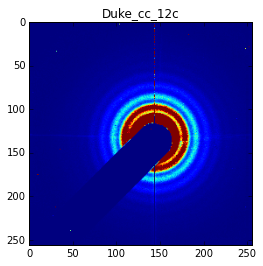

In [84]:
data_dir = "/Volumes/Data/BeamLines/CHX/Luxi_description_files_for_duke/duke_cc_12C/"
duke_ndata = np.load(data_dir+"duke_img_1_5000.npy")
duke_dark = np.load(data_dir+"duke_dark.npy")

duke_data = []
for i in range(duke_ndata.shape[0]):
    duke_data.append(duke_ndata[i] - duke_dark)
    
duke_data=np.asarray(duke_data)

avg_img = np.average(duke_data, axis=0)
plt.imshow(avg_img, vmax=1e0)
plt.title("Duke_cc_12c")
plt.show()

In [85]:
new_mask4 = auto_mask(avg_img, size=20)

6190.35117909
[[  0   0   4   5   6   9  10  11  12  15  15  17  18  21  23  24  27  29
   31  34  35  36  37  39  40  46  47  49  53  56  57  58  59  64  68  69
   70  71  72  73  74  76  78  84  85  86  88  90  92  94  95  99 103 104
  116 120 120 121 121 121 123 131 131 133 136 137 140 142 146 151 152 152
  154 155 175 212]
 [143 156 143 143 143 143 143 143 143 143 182 143 143 143 143 143 143 251
  143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 143
  143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 143
  144 130 156 129 156 157 139 170 171 163 171 170 170 177  35 157 156 157
  154 156  10  30]]


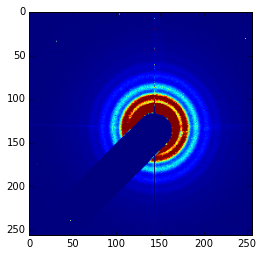

In [86]:
plt.imshow(new_mask4, vmax=1e0)

In [87]:
np.max(new_mask4)

6020.6469999999999

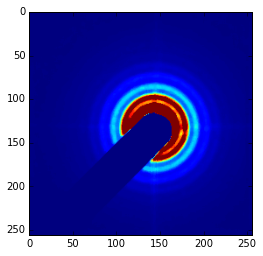

In [88]:
blur_image = median_filter(avg_img, size=5)
plt.imshow(blur_image, vmax=1e0)

In [89]:
diff=avg_img - blur_image

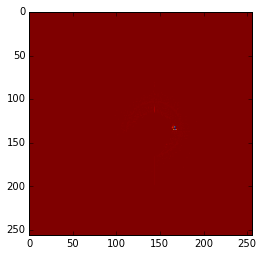

In [90]:
plt.imshow(diff, vmax=1e0)

In [91]:
thershold_value = 7*np.std(diff)

In [92]:
thershold_value

472.71888481861748

In [93]:
np.max(diff)

6015.6048000000001

In [94]:
np.nonzero((np.abs(diff) > thershold_value))

(array([ 44, 100, 108, 115, 115, 115, 115, 116, 116, 118, 119, 119, 119,
        120, 120, 120, 122, 122, 131, 132, 133, 133, 133, 133, 133, 134,
        134, 134, 136, 136, 136, 136, 137, 150, 151, 152, 153, 153, 153,
        153, 154, 154, 154, 155, 155]),
 array([143, 143, 143, 139, 140, 144, 145, 145, 146, 132, 130, 131, 154,
        129, 155, 157, 158, 159, 169, 163, 165, 166, 167, 168, 169, 163,
        164, 168, 166, 167, 168, 170, 169, 158, 158, 158, 155, 156, 157,
        158, 155, 156, 157, 155, 157]))

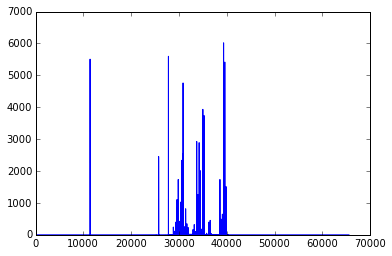

In [95]:
plt.plot(np.ravel(new_mask4))

In [96]:
data_dir = "/Users/sameera/Desktop/XSVS/Luxi_data/"

mask= ~np.load(data_dir+"Luxi_duke_mask.npy")

mask_sum_img = new_mask4*mask

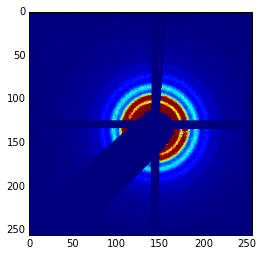

In [97]:
plt.imshow(mask_sum_img, vmax=1e0)

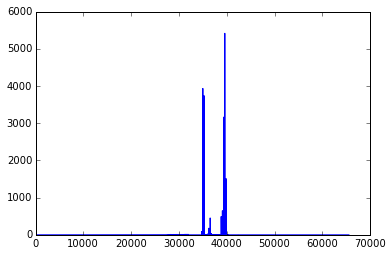

In [98]:

plt.plot(np.ravel(mask_sum_img))

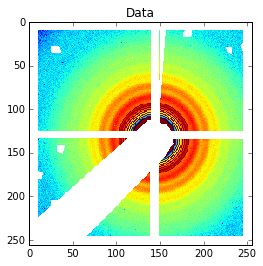

In [99]:
import skxray.roi as roi

inner_radius = 24
width = 1
spacing = 1
num_rings = 9

edges = roi.ring_edges(inner_radius, width, spacing, num_rings)

rings = roi.rings(edges, (133, 143), sum_img.shape)

def test_demo(ax, label_array, img_dim, image):
    """
    This will plot the reqiured roi's on the image
    """

    vmin, vmax = np.percentile(image, [100, 100])
    #im = ax.imshow(tt.reshape(*img_dim), cmap='Paired', interpolation='nearest')
    im = ax.imshow(image, interpolation='none', norm=LogNorm(), vmax=1e0)
    im = ax.imshow(label_array, interpolation='none', norm=LogNorm())
    #im = ax.imshow(image, interpolation='none',  vmax=1e0)
    
    
fig, ax = plt.subplots()
plt.title("Data")
test_demo(ax, rings*mask, sum_img.shape, sum_img*mask)
plt.show()

In [104]:
import skxray.speckle_visibility.speckle_visibility as spe_vis
int_dist = spe_vis.intensity_distribution(mask_sum_img, rings*mask)

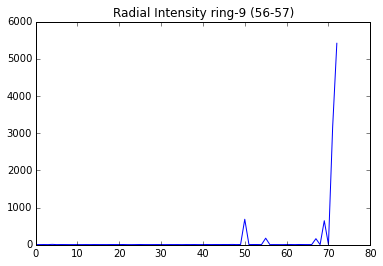

In [112]:
plt.plot(int_dist.values()[0])
plt.title("Radial Intensity ring-9 (56-57)")
plt.show()